## Тестовое задание. Mediascope

Датасет для работы: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023


1. Необходимо проверить гипотезу, есть ли "счастливый" день недели для релиза. Предпочитаемый инструмент - Python.
2. Предложите идеи для трёх слайдов, если бы перед вами стояла задача подготовить интересные факты для годовой презентации сервиса.


ЦА презентации - широкая публика (пользователи сервиса, журналисты, обычные люди). Обоснуйте своё мнение.

## Импорты

In [218]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro, kruskal, mannwhitneyu
import itertools
import numpy as np
from wordcloud import WordCloud

pd.set_option('display.max_columns', None)


## Загрузка данных

In [24]:
data = pd.read_csv("spotify-2023.csv", encoding='Windows-1252')

Описание полей:
- track_name: Name of the song
- artist(s)_name: Name of the artist(s) of the song
- artist_count: Number of artists contributing to the song
- released_year: Year when the song was released
- released_month: Month when the song was released
- released_day: Day of the month when the song was released
- in_spotify_playlists: Number of Spotify playlists the song is included in
- in_spotify_charts: Presence and rank of the song on Spotify charts
- streams: Total number of streams on Spotify
- in_apple_playlists: Number of Apple Music playlists the song is included in
- in_apple_charts: Presence and rank of the song on Apple Music charts
- in_deezer_playlists: Number of Deezer playlists the song is included in
- in_deezer_charts: Presence and rank of the song on Deezer charts
- in_shazam_charts: Presence and rank of the song on Shazam charts
- bpm: Beats per minute, a measure of song tempo
- key: Key of the song
- mode: Mode of the song (major or minor)
- danceability_%: Percentage indicating how suitable the song is for dancing
- valence_%: Positivity of the song's musical content
- energy_%: Perceived energy level of the song
- acousticness_%: Amount of acoustic sound in the song
- instrumentalness_%: Amount of instrumental content in the song
- liveness_%: Presence of live performance elements
- speechiness_%: Amount of spoken words in the song

In [25]:
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


In [26]:
data[data['streams'] == data['streams'].max()]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,0,54,0,0,110,A,Major,53,75,69,7,0,17,3


In [27]:
data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [28]:
data.shape

(953, 24)

In [29]:
for col in data.columns:
    print(data[col].value_counts())
    print()

track_name
Daylight                                  2
About Damn Time                           2
SNAP                                      2
Take My Breath                            2
Let It Snow! Let It Snow! Let It Snow!    2
                                         ..
Murder In My Mind                         1
Gangsta's Paradise                        1
CAIRO                                     1
I Love You So                             1
Alone                                     1
Name: count, Length: 943, dtype: int64

artist(s)_name
Taylor Swift                 34
The Weeknd                   22
Bad Bunny                    19
SZA                          19
Harry Styles                 17
                             ..
Karol G, Ovy On The Drums     1
Coolio, L.V.                  1
Kordhell                      1
Kenia OS                      1
Feid, Sech, Jhayco            1
Name: count, Length: 645, dtype: int64

artist_count
1    587
2    254
3     85
4     15
5      5


## Препроцессинг

Шаги:
1. собрать дату из трех полей, выделить в отдельное поле день недели
2. очистить данные, где streams плохие
3. нормализовать стримы, разделив на количество дней с релиза, чтобы старые треки сопоставить с новыми
4. взять z-score, чтобы значения метрики успеха были более интерпретируемыми и сравнимыми

v2:

добавить в качестве метрики успешности компоненту "количество плейлистов в спотифае, в которые попал трек", или in_spotify_playlists после нормализации на количество дней с релиза. Взять линейную комбинацию нормализованных стримов и нормализованных плейлистов с весами w1 и w1. Тогда финальная метрика успеха будет отражать не только "массовость" трека, но и его способность быть избранным в плейлисты.

In [30]:
data['release_date'] = data.apply(lambda x: datetime.strptime(str(x['released_year']) + "-" + str(x['released_month']) + "-" + str(x['released_day']), "%Y-%m-%d"), axis=1)
data['release_weekday'] = data['release_date'].dt.weekday
day_names_0_to_6 = ["ПН", "ВТ", "СР", "ЧТ", "ПТ", "СБ", "ВС"]
data['release_weekday_nm'] = data['release_weekday'].apply(lambda x: day_names_0_to_6[x])

In [31]:
data.loc[:, 'streams'] = data['streams'].astype(str).str.replace(',', '', regex=False)
data = data[data['streams'].str.isnumeric()]
data.loc[:, 'streams'] = data['streams'].astype(float)

In [32]:
data['days_since_release'] = (datetime.today() - data['release_date']).dt.days

In [33]:
data.loc[:, 'norm_streams'] = data['streams']/data['days_since_release']
data.loc[:, 'norm_streams_z_score'] = (data['norm_streams'] - data['norm_streams'].mean())/data['norm_streams'].std()

In [34]:
data.sort_values('norm_streams_z_score', ascending=False).head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date,release_weekday,release_weekday_nm,days_since_release,norm_streams,norm_streams_z_score
14,As It Was,Harry Styles,1,2022,3,31,23575,130,2513188493.0,403,198,863,46,NaN,174,F#,Minor,52,66,73,34,0,31,6,2022-03-31,3,ЧТ,1323,1899613.373394,6.803515
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074.0,672,199,"3,421",20,NaN,171,C#,Major,50,38,80,0,0,9,7,2019-11-29,4,ПТ,2176,1702157.662684,5.985036
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2665343922.0,492,99,798,31,0,170,C#,Major,59,48,76,4,0,10,5,2021-07-09,4,ПТ,1588,1678428.162469,5.886674
71,Heat Waves,Glass Animals,1,2020,6,28,22543,63,2557975762.0,386,144,707,28,NaN,81,B,Major,76,53,53,44,0,9,9,2020-06-28,6,ВС,1964,1302431.650713,4.328121
12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1316855716.0,300,215,745,58,"1,021",118,NaN,Major,71,65,68,6,0,3,7,2023-01-12,3,ЧТ,1036,1271096.250965,4.198232


In [35]:
# v2 - добавление компоненты количества плейлистов
data.loc[:, 'norm_playlists'] = data['in_spotify_playlists']/data['days_since_release']
data.loc[:, 'norm_playlists_z_score'] = (data['norm_playlists'] - data['norm_playlists'].mean())/data['norm_playlists'].std()

In [36]:
data.sort_values('norm_playlists_z_score', ascending=False).head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date,release_weekday,release_weekday_nm,days_since_release,norm_streams,norm_streams_z_score,norm_playlists,norm_playlists_z_score
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074.0,672,199,"3,421",20,NaN,171,C#,Major,50,38,80,0,0,9,7,2019-11-29,4,ПТ,2176,1702157.662684,5.985036,20.174173,8.015615
14,As It Was,Harry Styles,1,2022,3,31,23575,130,2513188493.0,403,198,863,46,NaN,174,F#,Minor,52,66,73,34,0,31,6,2022-03-31,3,ЧТ,1323,1899613.373394,6.803515,17.819350,6.967923
162,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2713922350.0,433,107,"3,631",0,26,104,C#,Major,77,36,63,1,0,36,5,2016-04-04,0,ПН,3510,773197.250712,2.134377,12.323932,4.522938
407,Don't Start Now,Dua Lipa,1,2019,10,31,27119,0,2303033973.0,532,77,"1,535",3,8,124,B,Minor,79,68,79,1,0,10,8,2019-10-31,3,ЧТ,2205,1044459.851701,3.258795,12.298866,4.511786
12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1316855716.0,300,215,745,58,"1,021",118,NaN,Major,71,65,68,6,0,3,7,2023-01-12,3,ЧТ,1036,1271096.250965,4.198232,11.786680,4.283908


In [37]:
# v2 - комбинация метрик norm_streams_z_score и norm_playlists_z_score
# веса wi = 0.5 и w2 = 0.5 для баланса
w1 = 0.5
w2 = 0.5
data.loc[:, 'success_index'] = w1 * data['norm_streams_z_score'] + w2 * data['norm_playlists_z_score']

In [38]:
data.sort_values('success_index', ascending=False).head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date,release_weekday,release_weekday_nm,days_since_release,norm_streams,norm_streams_z_score,norm_playlists,norm_playlists_z_score,success_index
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074.0,672,199,"3,421",20,NaN,171,C#,Major,50,38,80,0,0,9,7,2019-11-29,4,ПТ,2176,1702157.662684,5.985036,20.174173,8.015615,7.000325
14,As It Was,Harry Styles,1,2022,3,31,23575,130,2513188493.0,403,198,863,46,NaN,174,F#,Minor,52,66,73,34,0,31,6,2022-03-31,3,ЧТ,1323,1899613.373394,6.803515,17.819350,6.967923,6.885719
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2665343922.0,492,99,798,31,0,170,C#,Major,59,48,76,4,0,10,5,2021-07-09,4,ПТ,1588,1678428.162469,5.886674,10.736776,3.816791,4.851733
12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1316855716.0,300,215,745,58,"1,021",118,NaN,Major,71,65,68,6,0,3,7,2023-01-12,3,ЧТ,1036,1271096.250965,4.198232,11.786680,4.283908,4.24107
71,Heat Waves,Glass Animals,1,2020,6,28,22543,63,2557975762.0,386,144,707,28,NaN,81,B,Major,76,53,53,44,0,9,9,2020-06-28,6,ВС,1964,1302431.650713,4.328121,11.478106,4.146619,4.23737


Итоговые метрики, которые далее будут анализироваться:
- norm_streams_z_score - z-оценка нормализованного количества стримов (количество стримов, деленое на количество дней с релиза, приведенное к z-шкале со средним 0 и стандартным отклонением 1)
- norm_playlists_z_score - z-оценка нормализованного количества плейлистов с треком (количество плейлистов, деленое на количество дней с релиза, приведенное к z-шкале со средним 0 и стандартным отклонением 1)
- success_index - линейная комбинация norm_streams_z_score и norm_playlists_z_score с весами w1=0.5 и w2=0.5 (баланс между двумя метриками)

## Анализ метрик по дням


Нужно сгруппировать данные по дням недели выпуска трека и посчитать средние значения метрик, а затем найти отличия и проверить, насколько они значимы

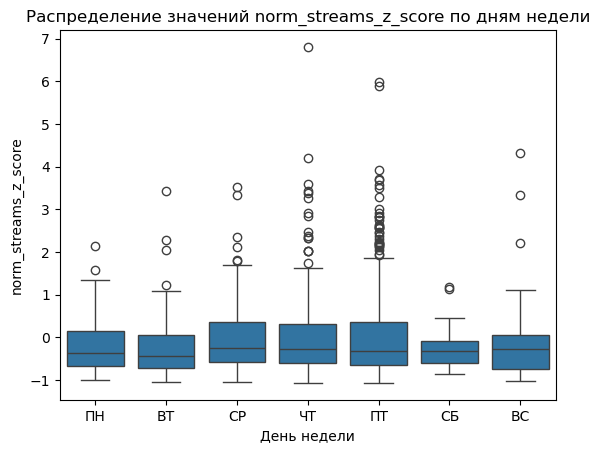

In [73]:
sns.boxplot(data=data, x='release_weekday_nm', y='norm_streams_z_score', order=day_names_0_to_6)
plt.title("Распределение значений norm_streams_z_score по дням недели")
plt.xlabel("День недели")
plt.show()

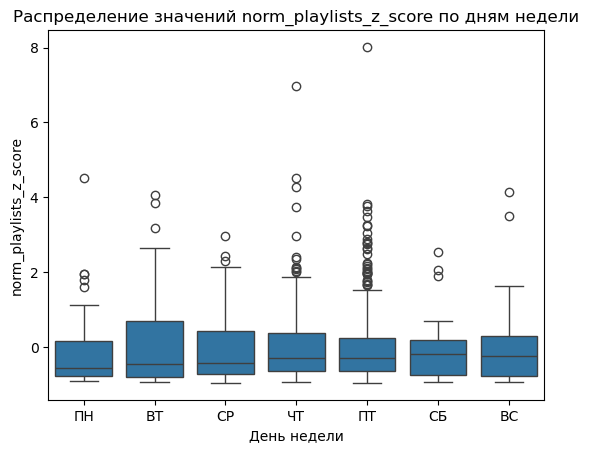

In [74]:
sns.boxplot(data=data, x='release_weekday_nm', y='norm_playlists_z_score', order=day_names_0_to_6)
plt.title("Распределение значений norm_playlists_z_score по дням недели")
plt.xlabel("День недели")
plt.show()

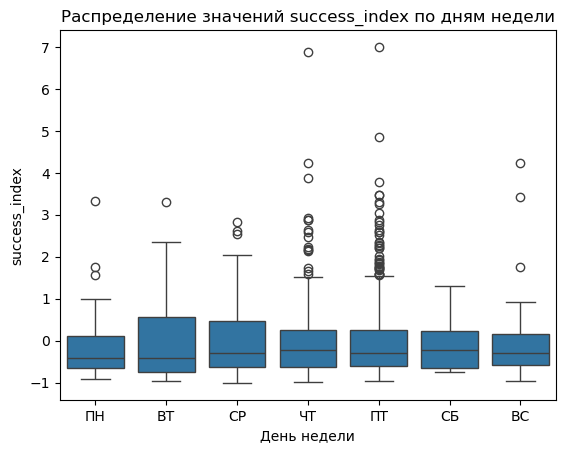

In [75]:
sns.boxplot(data=data, x='release_weekday_nm', y='success_index', order=day_names_0_to_6)
plt.title("Распределение значений success_index по дням недели")
plt.xlabel("День недели")
plt.show()

Из всех дней недели визуально выделяются четверг, пятница и суббота. У четверга и пятницы наибольшее количество особенно успешных треков (показаны как выбросы), а у субботы медианное значения количества плейлистов выше остальных. Можно считать четверг, пятницу и субботу кандидатами на звание "счастливого" дня 

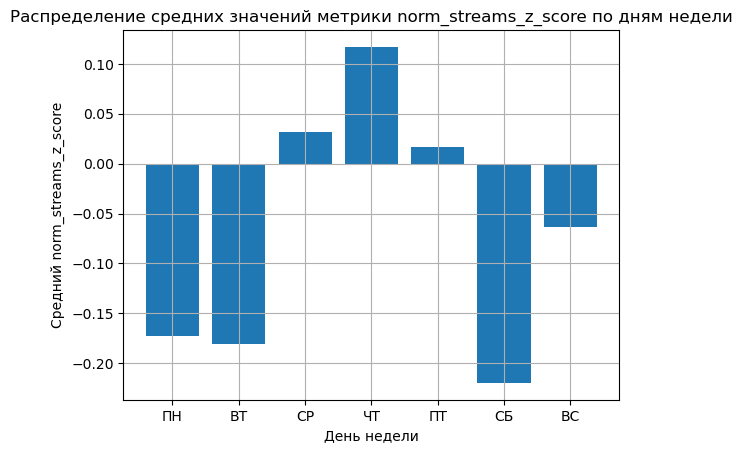

In [61]:
norm_streams_z_score_mean = data.groupby(["release_weekday", "release_weekday_nm"], as_index=False)['norm_streams_z_score'].mean()
plt.bar(norm_streams_z_score_mean['release_weekday_nm'], norm_streams_z_score_mean['norm_streams_z_score'])
plt.xlabel('День недели')
plt.ylabel('Средний norm_streams_z_score')
plt.title('Распределение средних значений метрики norm_streams_z_score по дням недели')
plt.grid()
plt.show()

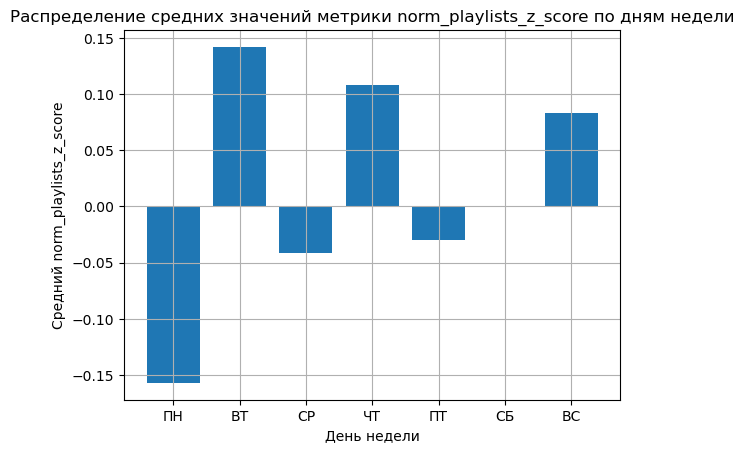

In [63]:
norm_playlists_z_score_mean = data.groupby(["release_weekday", "release_weekday_nm"], as_index=False)['norm_playlists_z_score'].mean()
plt.bar(norm_playlists_z_score_mean['release_weekday_nm'], norm_playlists_z_score_mean['norm_playlists_z_score'])
plt.xlabel('День недели')
plt.ylabel('Средний norm_playlists_z_score')
plt.title('Распределение средних значений метрики norm_playlists_z_score по дням недели')
plt.grid()
plt.show()

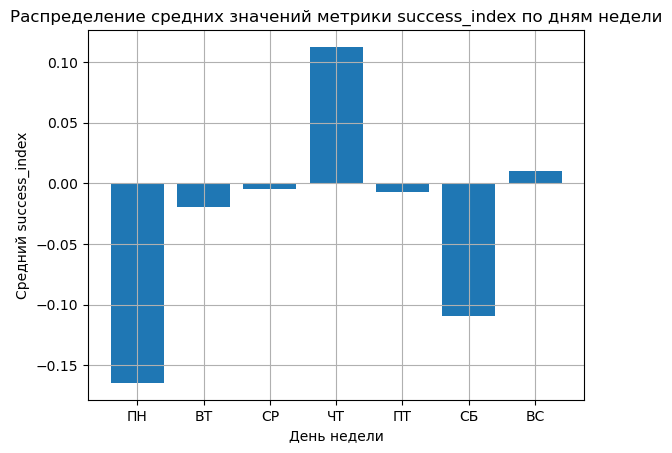

In [64]:
success_index_mean = data.groupby(["release_weekday", "release_weekday_nm"], as_index=False)['success_index'].mean()
plt.bar(success_index_mean['release_weekday_nm'], success_index_mean['success_index'])
plt.xlabel('День недели')
plt.ylabel('Средний success_index')
plt.title('Распределение средних значений метрики success_index по дням недели')
plt.grid()
plt.show()

По усредненным значениям метрик по дням можно выделить вторник, четверг. Для треков, вышедших во вторник, высокий средний norm_playlists_z_score. Четверг выделяется по всем трем метрикам.

Нужно проверить, являются ли статистически значимыми различия между значениями метрик по дням. Для этого можно воспользоваться методом ANOVA для сравнения разницы в средних нескольких групп.
Предварительно можно проверить распределение данных, подходит ли оно для данного метода.

Если, например, проверка данных на нормальность проваливается, можно попробовать статистический критерий Краскела-Уоллиса для проверки равенства медиан.

### Проверка нормальности

In [111]:
def histogram_with_normal(data, ax=None, bins=15):
    """Гистограмма с наложенной нормальной кривой"""
    if ax is None:
        ax = plt.gca()
    
    # Гистограмма
    n, bins, patches = ax.hist(data, bins=bins, density=True, alpha=0.7, 
                              color='skyblue', edgecolor='black')
    
    # Нормальное распределение
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    mu, std = np.mean(data), np.std(data)
    p = stats.norm.pdf(x, mu, std)
    ax.plot(x, p, 'r-', linewidth=2, label=f'N(μ={mu:.2f}, σ={std:.2f})')
    
    ax.set_xlabel('мера')
    ax.set_ylabel('плотность')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    return ax

#### norm_streams_z_score

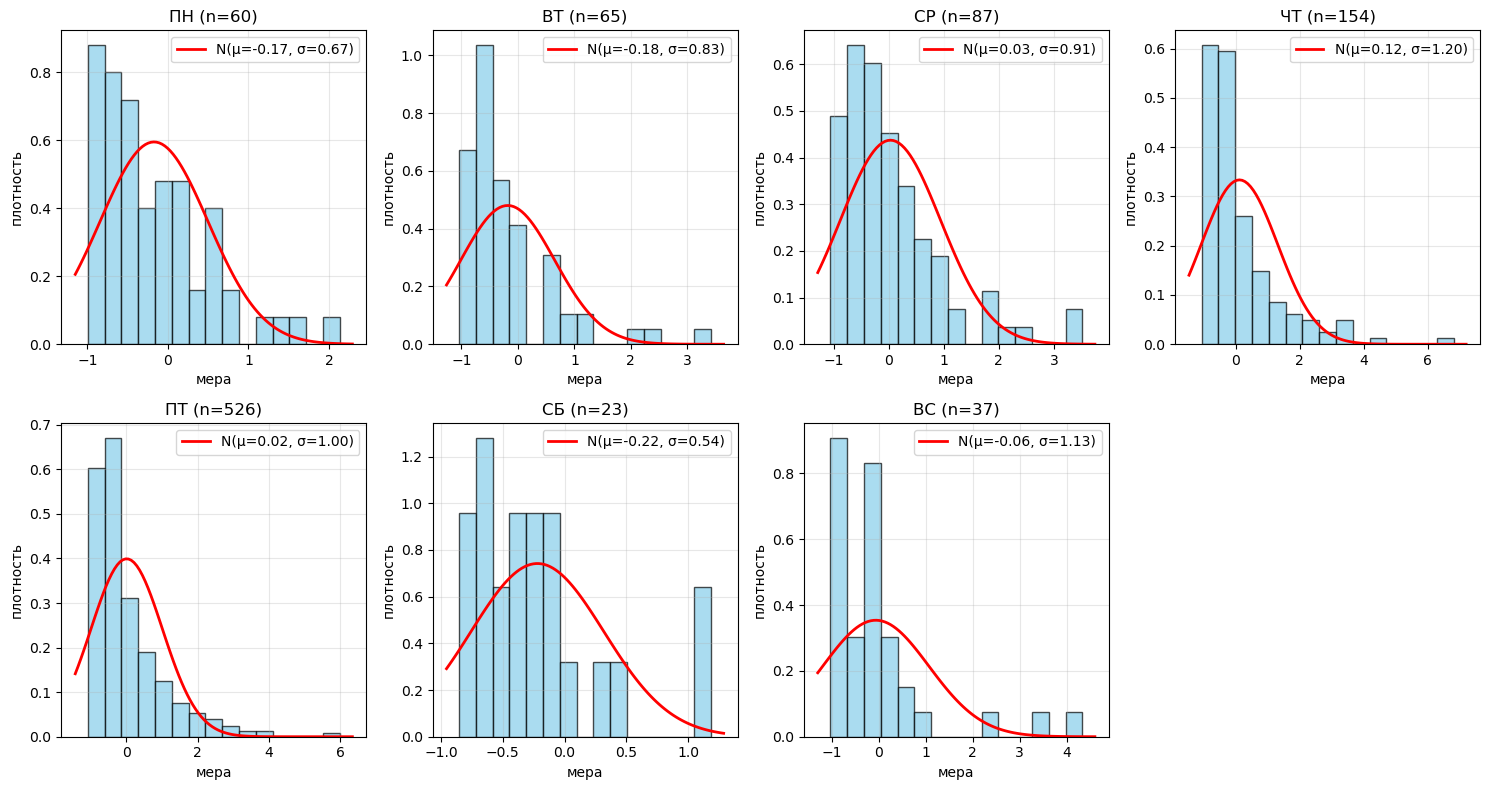

In [112]:
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.flatten()

for i, day in enumerate(day_names_0_to_6):
    if i < len(axes):
        day_data = data[data['release_weekday_nm'] == day]['norm_streams_z_score'].values
        histogram_with_normal(day_data, axes[i])
        axes[i].set_title(f'{day} (n={len(day_data)})')

for i in range(len(day_names_0_to_6), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [113]:
for day in day_names_0_to_6:
    day_data = data[data['release_weekday_nm'] == day]['norm_streams_z_score']
    stat, p_value = shapiro(day_data)
    print(f'{day}: W={stat:.3f}, p={p_value:.3f}')

ПН: W=0.891, p=0.000
ВТ: W=0.798, p=0.000
СР: W=0.858, p=0.000
ЧТ: W=0.760, p=0.000
ПТ: W=0.795, p=0.000
СБ: W=0.862, p=0.004
ВС: W=0.695, p=0.000


In [114]:
stat, p_value = shapiro(data['norm_streams_z_score'])
print(f'Все данные: W={stat:.3f}, p={p_value:.3f}')

Все данные: W=0.788, p=0.000


#### norm_playlists_z_score

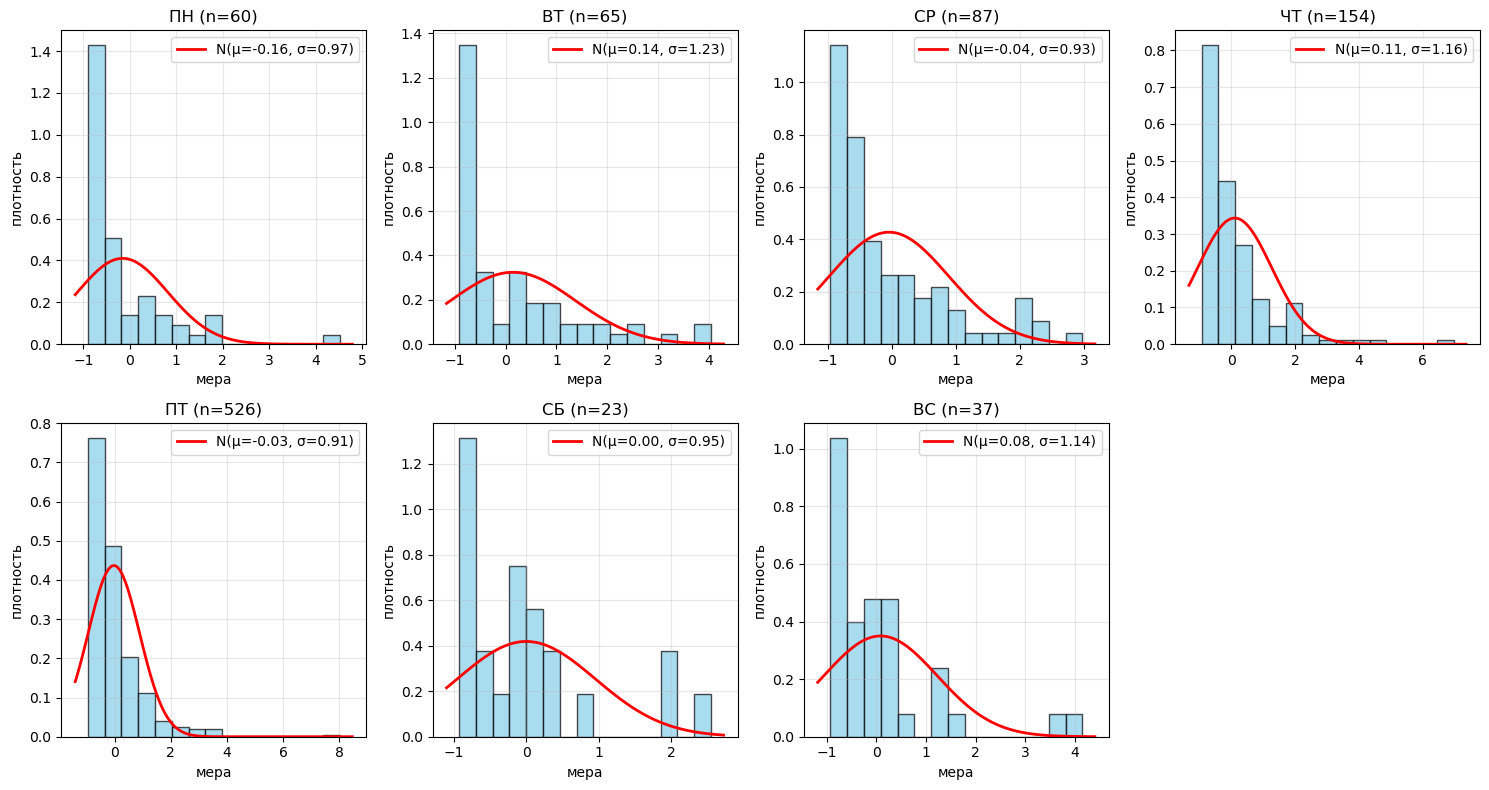

In [115]:
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.flatten()

for i, day in enumerate(day_names_0_to_6):
    if i < len(axes):
        day_data = data[data['release_weekday_nm'] == day]['norm_playlists_z_score'].values
        histogram_with_normal(day_data, axes[i])
        axes[i].set_title(f'{day} (n={len(day_data)})')

for i in range(len(day_names_0_to_6), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [116]:
for day in day_names_0_to_6:
    day_data = data[data['release_weekday_nm'] == day]['norm_playlists_z_score']
    stat, p_value = shapiro(day_data)
    print(f'{day}: W={stat:.3f}, p={p_value:.3f}')

ПН: W=0.714, p=0.000
ВТ: W=0.803, p=0.000
СР: W=0.820, p=0.000
ЧТ: W=0.743, p=0.000
ПТ: W=0.760, p=0.000
СБ: W=0.813, p=0.001
ВС: W=0.773, p=0.000


In [117]:
stat, p_value = shapiro(data['norm_playlists_z_score'])
print(f'Все данные: W={stat:.3f}, p={p_value:.3f}')

Все данные: W=0.769, p=0.000


#### success_index

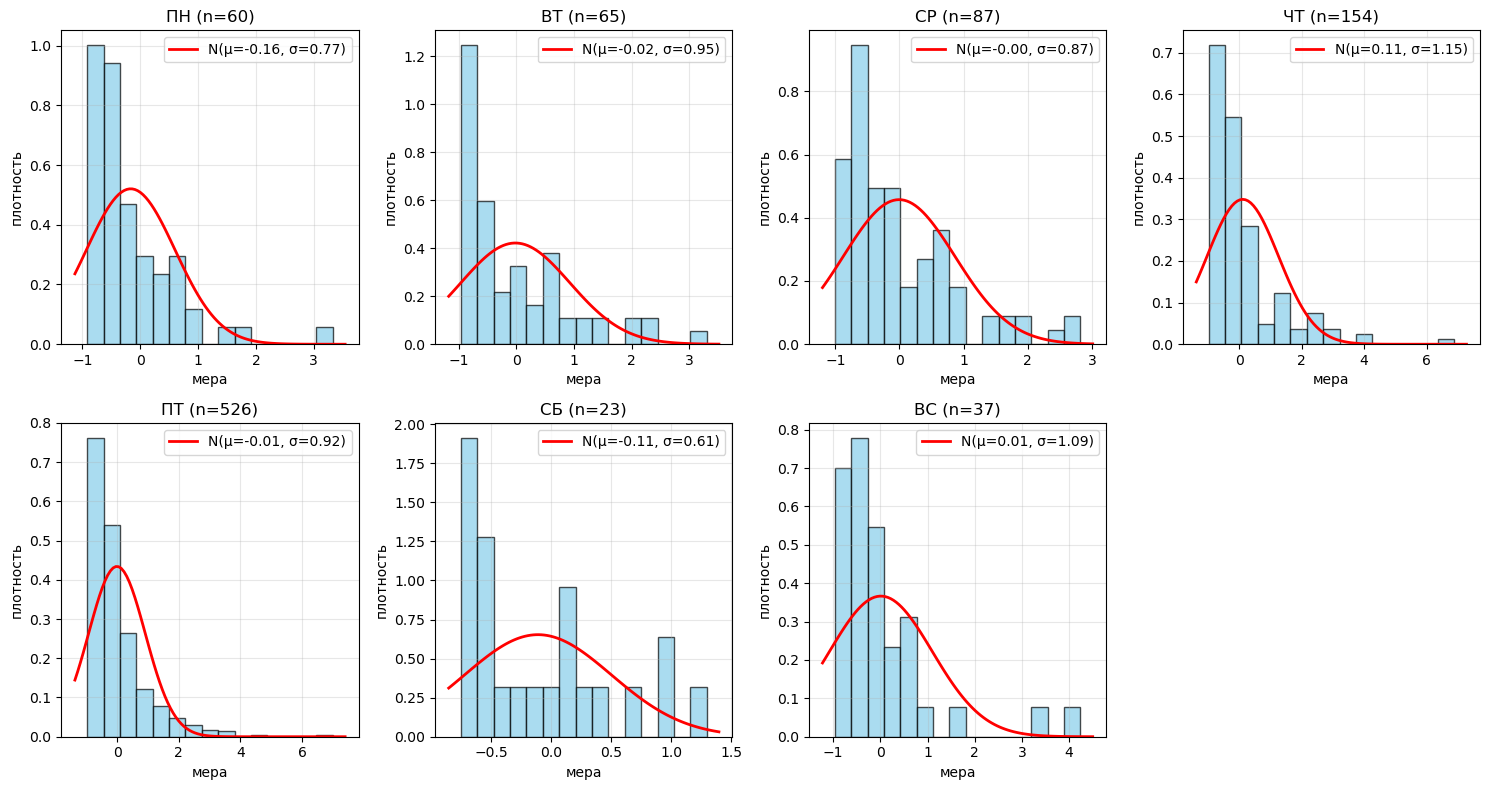

In [118]:
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.flatten()

for i, day in enumerate(day_names_0_to_6):
    if i < len(axes):
        day_data = data[data['release_weekday_nm'] == day]['success_index'].values
        histogram_with_normal(day_data, axes[i])
        axes[i].set_title(f'{day} (n={len(day_data)})')

for i in range(len(day_names_0_to_6), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [119]:
for day in day_names_0_to_6:
    day_data = data[data['release_weekday_nm'] == day]['success_index']
    stat, p_value = shapiro(day_data)
    print(f'{day}: W={stat:.3f}, p={p_value:.3f}')

ПН: W=0.788, p=0.000
ВТ: W=0.840, p=0.000
СР: W=0.855, p=0.000
ЧТ: W=0.746, p=0.000
ПТ: W=0.773, p=0.000
СБ: W=0.890, p=0.016
ВС: W=0.718, p=0.000


In [120]:
stat, p_value = shapiro(data['success_index'])
print(f'Все данные: W={stat:.3f}, p={p_value:.3f}')

Все данные: W=0.779, p=0.000


Если взять уровень значимости 0.01, то отвергнуть нулевую гипотезу и сказать, что данные распределены нормально, можно только для группы СБ по метрике success_index. Но группа очень маленькая (<30 треков) и в целом есть значительные различия в размерах групп. Поэтому использовать ANOVA не получится.

### Тест Краскела-Уоллиса

In [157]:
def kruskal_wallis_test(df, group_col, value_col, importance_lvl=0.05):
    """
    Проведение теста Крускала-Уоллиса для сравнения групп
    """
    groups = []
    group_names = []
    
    for group_name in day_names_0_to_6:
        group_data = df[df[group_col] == group_name][value_col].dropna()
        groups.append(group_data.values)
        group_names.append(group_name)
    
    stat, p_value = kruskal(*groups)
    
    print(f"Количество групп: {len(groups)}")
    print(f"H-статистика: {stat:.4f}")
    print(f"p-value: {p_value:.5f}")

    
    # Дополнительная информация о группах
    print(f"\nИнформация о группах:")
    for i, (name, data) in enumerate(zip(group_names, groups)):
        print(f"  {name}: n={len(data)}, медиана={np.median(data):.3f}")
    
    return {
        'statistic': stat,
        'p_value': p_value,
        'group_names': group_names,
        'group_medians': [np.median(data) for data in groups],
        'group_sizes': [len(data) for data in groups],
        'significant': p_value < importance_lvl
    }

In [158]:
print("Анализ влияния дня недели на метрику norm_streams_z_score:")
kruskal_results = kruskal_wallis_test(data, 'release_weekday_nm', 'norm_streams_z_score')

if kruskal_results['significant']:
    print("ВЫВОД: Есть статистически значимые различия между группами")
    best_idx = np.argmax(kruskal_results['group_medians'])
    worst_idx = np.argmin(kruskal_results['group_medians'])
    print(f"Лучшая группа: {kruskal_results['group_names'][best_idx]} (медиана: {kruskal_results['group_medians'][best_idx]:.3f})")
    print(f"Худшая группа: {kruskal_results['group_names'][worst_idx]} (медиана: {kruskal_results['group_medians'][worst_idx]:.3f})")
else:
    print("ВЫВОД: Нет статистически значимых различий между группами")

Анализ влияния дня недели на метрику norm_streams_z_score:
Количество групп: 7
H-статистика: 5.6205
p-value: 0.46702

Информация о группах:
  ПН: n=60, медиана=-0.361
  ВТ: n=65, медиана=-0.450
  СР: n=87, медиана=-0.246
  ЧТ: n=154, медиана=-0.270
  ПТ: n=526, медиана=-0.326
  СБ: n=23, медиана=-0.320
  ВС: n=37, медиана=-0.278
ВЫВОД: Нет статистически значимых различий между группами


In [159]:
print("Анализ влияния дня недели на метрику norm_playlists_z_score:")
kruskal_results = kruskal_wallis_test(data, 'release_weekday_nm', 'norm_playlists_z_score')

if kruskal_results['significant']:
    print("ВЫВОД: Есть статистически значимые различия между группами")
    best_idx = np.argmax(kruskal_results['group_medians'])
    worst_idx = np.argmin(kruskal_results['group_medians'])
    print(f"Лучшая группа: {kruskal_results['group_names'][best_idx]} (медиана: {kruskal_results['group_medians'][best_idx]:.3f})")
    print(f"Худшая группа: {kruskal_results['group_names'][worst_idx]} (медиана: {kruskal_results['group_medians'][worst_idx]:.3f})")
else:
    print("ВЫВОД: Нет статистически значимых различий между группами")

Анализ влияния дня недели на метрику norm_playlists_z_score:
Количество групп: 7
H-статистика: 7.8471
p-value: 0.24952

Информация о группах:
  ПН: n=60, медиана=-0.565
  ВТ: n=65, медиана=-0.441
  СР: n=87, медиана=-0.433
  ЧТ: n=154, медиана=-0.284
  ПТ: n=526, медиана=-0.287
  СБ: n=23, медиана=-0.191
  ВС: n=37, медиана=-0.240
ВЫВОД: Нет статистически значимых различий между группами


In [160]:
print("Анализ влияния дня недели на метрику success_index:")
kruskal_results = kruskal_wallis_test(data, 'release_weekday_nm', 'success_index')

if kruskal_results['significant']:
    print("ВЫВОД: Есть статистически значимые различия между группами")
    best_idx = np.argmax(kruskal_results['group_medians'])
    worst_idx = np.argmin(kruskal_results['group_medians'])
    print(f"Лучшая группа: {kruskal_results['group_names'][best_idx]} (медиана: {kruskal_results['group_medians'][best_idx]:.3f})")
    print(f"Худшая группа: {kruskal_results['group_names'][worst_idx]} (медиана: {kruskal_results['group_medians'][worst_idx]:.3f})")
else:
    print("ВЫВОД: Нет статистически значимых различий между группами")

Анализ влияния дня недели на метрику success_index:
Количество групп: 7
H-статистика: 3.6341
p-value: 0.72605

Информация о группах:
  ПН: n=60, медиана=-0.419
  ВТ: n=65, медиана=-0.407
  СР: n=87, медиана=-0.302
  ЧТ: n=154, медиана=-0.219
  ПТ: n=526, медиана=-0.305
  СБ: n=23, медиана=-0.214
  ВС: n=37, медиана=-0.283
ВЫВОД: Нет статистически значимых различий между группами


По критерию Краскела-Уоллиса не удалось выявить статистически значимых различий между группами. Так как тест сравнивает медианные значения, а в них даже визуально разница не так заметна, нужно сравнить средние значения метрик или распределения целиком, есть ли в них разница.

По графикам кажется, что четверг может называться "счастливым" днем для релиза, но статистических подтверждений этому нет 

### Тест Манна-Уитни

In [183]:
def pairwise_mannwhitney(df, group_col, value_col, importance_lvl=0.05):
    """
    Попарный тест Манна-Уитни
    """
    
    # Собираем данные по группам
    groups_data = {}
    group_stats = {}
    
    for day in day_names_0_to_6:
        day_data = df[df[group_col] == day][value_col]
        groups_data[day] = day_data
        group_stats[day] = {
            'n': len(day_data),
            'median': np.median(day_data),
            'mean': np.mean(day_data)
        }
    
    # Выводим статистику по группам
    print("Информация о группах:")
    for day, stats in group_stats.items():
        print(f"  {day}: n={stats['n']}, медиана={stats['median']:.4f}, среднее={stats['mean']:.4f}")
    print()
    
    # Попарные сравнения
    days = list(groups_data.keys())
    pairwise_results = []
    
    for day1, day2 in itertools.combinations(days, 2):
        data1 = np.array(groups_data[day1], dtype=float)
        data2 = np.array(groups_data[day2], dtype=float)
        np.isnan(data1)
        
        # Тест Манна-Уитни
        stat, p_value = mannwhitneyu(data1, data2, alternative="two-sided")
        
        n1, n2 = len(data1), len(data2)
        
        significant = p_value < importance_lvl
        
        pairwise_results.append({
            'group1': day1,
            'group2': day2,
            'U_statistic': stat,
            'p_value': p_value,
            'significant': significant,
            'n1': n1,
            'n2': n2
        })
        
        # Вывод результата
        print(f"   {day1} vs {day2}:")
        print(f"   U = {stat:.1f}, p = {p_value:.4f} {'*' if p_value < 0.05 else ''}")
        print(f"   Медианы: {np.median(data1):.4f} vs {np.median(data2):.4f}")
        print(f"   Средние: {np.mean(data1):.4f} vs {np.mean(data2):.4f}")
        print(f"   Размеры: {n1} vs {n2}")
        print()
    
    return pairwise_results, groups_data





In [184]:
print("Анализ разницы в распределениях метрики norm_streams_z_score по дням недели:")

results, groups_data = pairwise_mannwhitney(data, 'release_weekday_nm', 'norm_streams_z_score')

significant_results = [r for r in results if r['significant']]

if significant_results:
    print(f"Обнаружено {len(significant_results)} значимых различий:")
    for result in significant_results:
        print(f"   • {result['group1']} vs {result['group2']}: p={result['p_value']:.4f}")
else:
    print("Значимых различий не обнаружено")

Анализ разницы в распределениях метрики norm_streams_z_score по дням недели:
Информация о группах:
  ПН: n=60, медиана=-0.3610, среднее=-0.1724
  ВТ: n=65, медиана=-0.4502, среднее=-0.1806
  СР: n=87, медиана=-0.2456, среднее=0.0315
  ЧТ: n=154, медиана=-0.2702, среднее=0.1170
  ПТ: n=526, медиана=-0.3261, среднее=0.0166
  СБ: n=23, медиана=-0.3197, среднее=-0.2199
  ВС: n=37, медиана=-0.2775, среднее=-0.0632

   ПН vs ВТ:
   U = 2078.0, p = 0.5287 
   Медианы: -0.3610 vs -0.4502
   Средние: -0.1724 vs -0.1806
   Размеры: 60 vs 65

   ПН vs СР:
   U = 2305.0, p = 0.2301 
   Медианы: -0.3610 vs -0.2456
   Средние: -0.1724 vs 0.0315
   Размеры: 60 vs 87

   ПН vs ЧТ:
   U = 4200.0, p = 0.3025 
   Медианы: -0.3610 vs -0.2702
   Средние: -0.1724 vs 0.1170
   Размеры: 60 vs 154

   ПН vs ПТ:
   U = 14722.0, p = 0.3947 
   Медианы: -0.3610 vs -0.3261
   Средние: -0.1724 vs 0.0166
   Размеры: 60 vs 526

   ПН vs СБ:
   U = 685.0, p = 0.9635 
   Медианы: -0.3610 vs -0.3197
   Средние: -0.1724 

In [185]:
print("Анализ разницы в распределениях метрики norm_playlists_z_score по дням недели:")

results, groups_data = pairwise_mannwhitney(data, 'release_weekday_nm', 'norm_playlists_z_score')

significant_results = [r for r in results if r['significant']]

if significant_results:
    print(f"Обнаружено {len(significant_results)} значимых различий:")
    for result in significant_results:
        print(f"   • {result['group1']} vs {result['group2']}: p={result['p_value']:.4f}")
else:
    print("Значимых различий не обнаружено")

Анализ разницы в распределениях метрики norm_playlists_z_score по дням недели:
Информация о группах:
  ПН: n=60, медиана=-0.5648, среднее=-0.1570
  ВТ: n=65, медиана=-0.4407, среднее=0.1419
  СР: n=87, медиана=-0.4325, среднее=-0.0411
  ЧТ: n=154, медиана=-0.2840, среднее=0.1080
  ПТ: n=526, медиана=-0.2871, среднее=-0.0303
  СБ: n=23, медиана=-0.1907, среднее=0.0003
  ВС: n=37, медиана=-0.2400, среднее=0.0827

   ПН vs ВТ:
   U = 1793.0, p = 0.4393 
   Медианы: -0.5648 vs -0.4407
   Средние: -0.1570 vs 0.1419
   Размеры: 60 vs 65

   ПН vs СР:
   U = 2345.0, p = 0.2972 
   Медианы: -0.5648 vs -0.4325
   Средние: -0.1570 vs -0.0411
   Размеры: 60 vs 87

   ПН vs ЧТ:
   U = 3650.0, p = 0.0172 *
   Медианы: -0.5648 vs -0.2840
   Средние: -0.1570 vs 0.1080
   Размеры: 60 vs 154

   ПН vs ПТ:
   U = 12638.0, p = 0.0115 *
   Медианы: -0.5648 vs -0.2871
   Средние: -0.1570 vs -0.0303
   Размеры: 60 vs 526

   ПН vs СБ:
   U = 605.0, p = 0.3899 
   Медианы: -0.5648 vs -0.1907
   Средние: -0.1

In [186]:
print("Анализ разницы в распределениях метрики success_index по дням недели:")

results, groups_data = pairwise_mannwhitney(data, 'release_weekday_nm', 'success_index')

significant_results = [r for r in results if r['significant']]

if significant_results:
    print(f"Обнаружено {len(significant_results)} значимых различий:")
    for result in significant_results:
        print(f"   • {result['group1']} vs {result['group2']}: p={result['p_value']:.4f}")
else:
    print("Значимых различий не обнаружено")

Анализ разницы в распределениях метрики success_index по дням недели:
Информация о группах:
  ПН: n=60, медиана=-0.4185, среднее=-0.1647
  ВТ: n=65, медиана=-0.4075, среднее=-0.0194
  СР: n=87, медиана=-0.3023, среднее=-0.0048
  ЧТ: n=154, медиана=-0.2186, среднее=0.1125
  ПТ: n=526, медиана=-0.3051, среднее=-0.0068
  СБ: n=23, медиана=-0.2140, среднее=-0.1098
  ВС: n=37, медиана=-0.2831, среднее=0.0097

   ПН vs ВТ:
   U = 1937.0, p = 0.9507 
   Медианы: -0.4185 vs -0.4075
   Средние: -0.1647 vs -0.0194
   Размеры: 60 vs 65

   ПН vs СР:
   U = 2345.0, p = 0.2972 
   Медианы: -0.4185 vs -0.3023
   Средние: -0.1647 vs -0.0048
   Размеры: 60 vs 87

   ПН vs ЧТ:
   U = 4002.0, p = 0.1291 
   Медианы: -0.4185 vs -0.2186
   Средние: -0.1647 vs 0.1125
   Размеры: 60 vs 154

   ПН vs ПТ:
   U = 13901.0, p = 0.1306 
   Медианы: -0.4185 vs -0.3051
   Средние: -0.1647 vs -0.0068
   Размеры: 60 vs 526

   ПН vs СБ:
   U = 622.0, p = 0.4922 
   Медианы: -0.4185 vs -0.2140
   Средние: -0.1647 vs -

In [209]:
improvement_thursday_mean = ((0.1080) - (-0.1570)) / abs(-0.1570) * 100
improvement_friday_mean = ((-0.0303) - (-0.1570)) / abs(-0.1570) * 100

In [191]:
improvement_thursday_median = ((-0.2840) - (-0.5648)) / abs(-0.5648) * 100
improvement_friday_median = ((-0.2871) - (-0.5648)) / abs(-0.5648) * 100

Тест Манна-Уитни помог обнаружить статистически значимые отличия только в распределениях значения метрики `norm_playlists_z_score`:
```Обнаружено 2 значимых различий:
   • ПН vs ЧТ: p=0.0172
   • ПН vs ПТ: p=0.0115
```
Подробное сравнение значений метрики в эти дни:

```
ПН vs ЧТ:
   U = 3650.0, p = 0.0172
   Медианы: -0.5648 vs -0.2840
   Средние: -0.1570 vs 0.1080
   Размеры: 60 vs 154

ПН vs ПТ:
   U = 12638.0, p = 0.0115
   Медианы: -0.5648 vs -0.2871
   Средние: -0.1570 vs -0.0303
   Размеры: 60 vs 526
```

In [207]:
print(f"Относительное улучшение медианного значения метрики norm_playlists_z_score (ПН VS ЧТ): +{improvement_thursday_median:.2f}%")

Относительное улучшение медианного значения метрики norm_playlists_z_score (ПН VS ЧТ): +49.72%


In [208]:
print(f"Относительное улучшение медианного значения метрики norm_playlists_z_score (ПН VS ПТ): +{improvement_friday_median:.2f}%")

Относительное улучшение медианного значения метрики norm_playlists_z_score (ПН VS ПТ): +49.17%


In [210]:
print(f"Относительное улучшение среднего значения метрики norm_playlists_z_score (ПН VS ЧТ): +{improvement_thursday_mean:.2f}%")

Относительное улучшение среднего значения метрики norm_playlists_z_score (ПН VS ЧТ): +168.79%


In [211]:
print(f"Относительное улучшение среднего значения метрики norm_playlists_z_score (ПН VS ПТ): +{improvement_friday_mean:.2f}%")

Относительное улучшение среднего значения метрики norm_playlists_z_score (ПН VS ПТ): +80.70%


## Выводы

Итого по результатам анализа удалось:
1. Выявить несколько метрик для оценки успешности трека, которые показывают популярные треки вне зависимости от года их выпуска
2. Визуализировать и проанализировать метрики по дням недели даты релиза и выявить, что визуально средние и медианные значения метрик наиболее высокие в вторник, четверг, пятницу и субботу
3. Проверить статистистическую значимость разницы между распределениями метрик в разные дни недели через тесты Краскела-Уоллиса и Манна-Уитни и увидеть, что при выбранном уровне значимости нет особых оснований полагать, что какой-то день является "счастливым"
4. Получить инсайт, что количество добавления трека в плейлисты значительно больше в четверг и пятницу значительно больше, чем в понедельник -> если выбирать между этими тремя днями, то понедельник - не лучший день для релиза трека, лучше рассматривать четверг-пятницу с точки зрения статистики успешности треков на исторических данных

## Для презентации

In [306]:
data_for_pr = data.copy()

In [307]:
repeated_df = data_for_pr.loc[data_for_pr.index.repeat(data_for_pr['streams']/100000)].reset_index(drop=True)

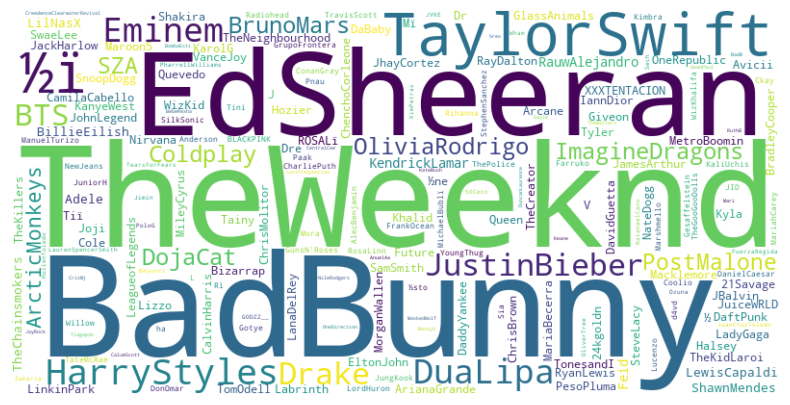

In [310]:
artists = data_for_pr[['artist(s)_name', 'streams']].copy()
artists['artist(s)_name'] = artists['artist(s)_name'].str.split(', ')
artists = artists.explode('artist(s)_name')
artists['artist(s)_name'] = artists['artist(s)_name'].str.replace(' ', '')
artists = artists.groupby('artist(s)_name', as_index=False)['streams'].sum()
artists = artists.loc[artists.index.repeat(artists['streams']/100000)].reset_index(drop=True)

wordcloud = WordCloud(width=800, height=400, collocations=False, background_color='')\
    .generate(' '.join(artists['artist(s)_name']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()